In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import numpy as np
import graphics as g

def imshow(img):
    # https://gist.github.com/ctmakro/3ae3cd9538390b706820cd01dac6861f
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

print("import success")

import success


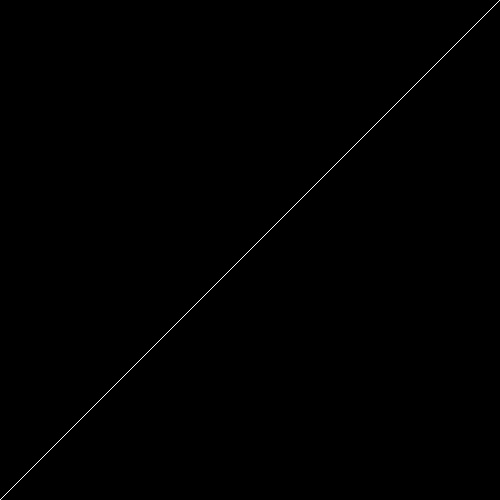

In [4]:
control_points = np.array([
    [0, 0],
    [499, 499]
], dtype=int)

def linear(p0, p1, u):
    return (1 - u) * p0 + u * p1

n_segments = 5
u_space = np.linspace(0, 1, n_segments + 1)
curve = np.zeros((n_segments + 1, 2), dtype=int)

for i, u in enumerate(u_space):
    curve[i] = linear(*control_points, u)

screen = g.create_screen((500, 500))
g.draw_points(screen, curve, lines=True)

imshow(screen)

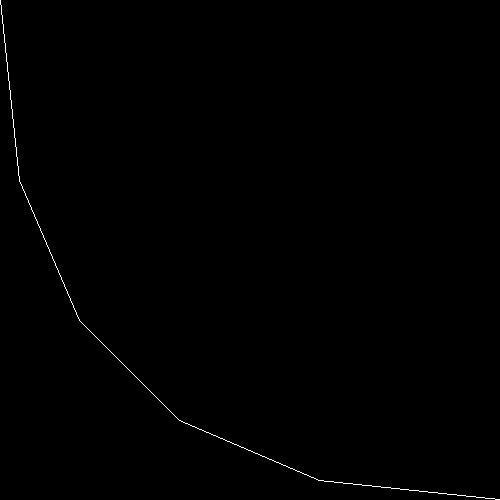

In [5]:
control_points = np.array([
    [0, 499],
    [0, 0],
    [499, 0]
], dtype=int)

def quadratic(p0, p1, p2, u):
    p0_u = linear(p0, p1, u)
    p1_u = linear(p1, p2, u)

    return linear(p0_u, p1_u, u)

n_segments = 5
u_space = np.linspace(0, 1, n_segments + 1)
curve = np.zeros((n_segments + 1, 2), dtype=int)

for i, u in enumerate(u_space):
    curve[i] = quadratic(*control_points, u)

screen = g.create_screen((500, 500))
g.draw_points(screen, curve, lines=True)

imshow(screen)

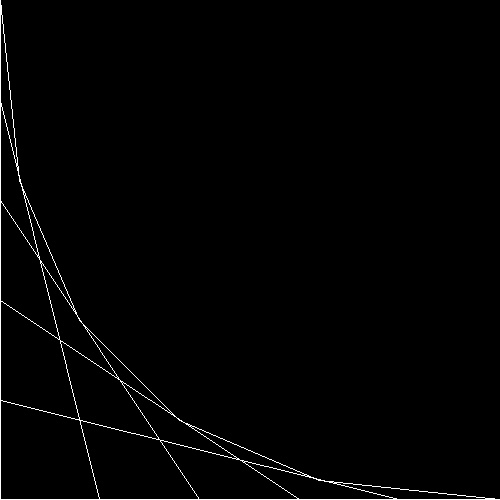

In [6]:
for i, u in enumerate(u_space):
    p0 = linear(*control_points[0:2], u)
    p1 = linear(*control_points[1:3], u)
    g.draw_line(screen, p0.astype(int), p1.astype(int))

imshow(screen)

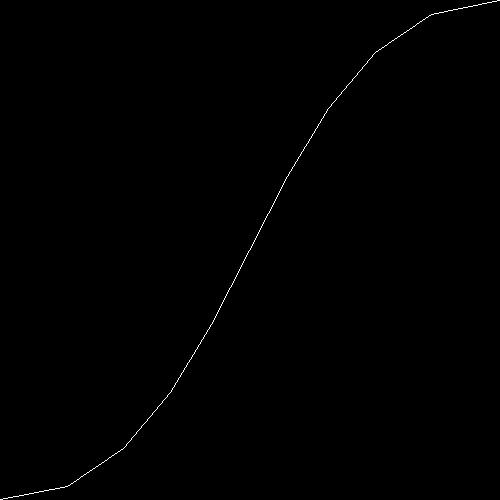

In [7]:
control_points = np.array([
    [0, 0],
    [249, 0],
    [249, 499],
    [499, 499]
], dtype=int)

def cubic(p0, p1, p2, p3, u):
    p0_u = quadratic(p0, p1, p2, u)
    p1_u = quadratic(p1, p2, p3, u)

    return linear(p0_u, p1_u, u)

n_segments = 10
u_space = np.linspace(0, 1, n_segments + 1)
curve = np.zeros((n_segments + 1, 2), dtype=int)

for i, u in enumerate(u_space):
    curve[i] = cubic(*control_points, u)

screen = g.create_screen((500, 500))
g.draw_points(screen, curve, lines=True)

imshow(screen)

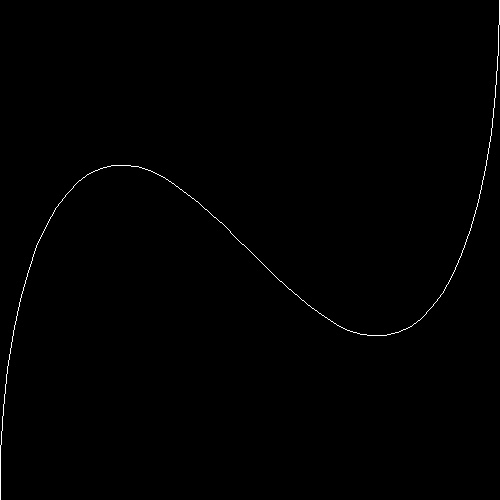

In [8]:
control_points = np.array([
    [0, 0],
    [0, 499],
    [249, 499],
    [249, 0],
    [499, 0],
    [499, 499]
], dtype=float)

def interpolate(points, u):
    n = len(points)

    if n == 2:
        return linear(*points, u)
    else:
        p0 = interpolate(points[0:n - 1], u)
        p1 = interpolate(points[1:n], u)

        return linear(p0, p1, u)

n_segments = 50
u_space = np.linspace(0, 1, n_segments + 1)
curve = np.zeros((n_segments + 1, 2), dtype=int)

for i, u in enumerate(u_space):
    curve[i] = interpolate(control_points, u)

screen = g.create_screen((500, 500))
g.draw_points(screen, curve, lines=True)

imshow(screen)

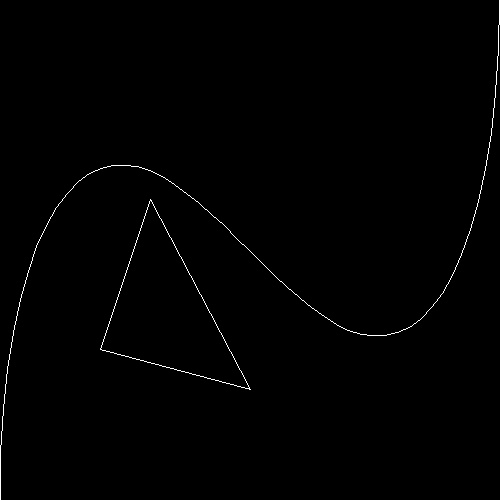

In [9]:
triangle = np.array([
    [100, 150],
    [150, 300],
    [250, 110]
], dtype=int)

g.draw_points(screen, triangle, lines=True, connect=True)

imshow(screen)